In [19]:
import jax.numpy as jnp

import matplotlib.pyplot as plt

def fibonacci_lattice(n_points):
    # The golden ratio
    phi = (1 + jnp.sqrt(5)) / 2

    # Generate an array of integers from 0 to n_points - 1
    i = jnp.arange(n_points)

    # Compute the spherical angles
    theta =jnp.arctan2(i, phi)
    phi = jnp.arccos(1 - 2*i / n_points)

    # Return the angles as a list of tuples
    return jnp.stack((phi, theta), axis=1)

def angles_to_points(angles):
    # Extract the phi and theta angles from the array
    phi = angles[:, 0]
    theta = angles[:, 1]

    # Convert the spherical angles to Cartesian coordinates
    x = jnp.sin(phi) * jnp.cos(theta)
    y = jnp.sin(phi) * jnp.sin(theta)
    z = jnp.cos(phi)

    # Stack the coordinates into an array of points
    points = jnp.stack((x, y, z), axis=1)
    return points

In [58]:
from jax import random
def fibonacci_sphere(samples=1000):
    phi = jnp.pi * (3. - jnp.sqrt(5.))  # golden angle in radians
    i = jnp.arange(samples)
    y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
    radius = jnp.sqrt(1 - y * y)  # radius at y
    theta = phi * i  # golden angle increment
    x = jnp.cos(theta) * radius
    z = jnp.sin(theta) * radius
    points = jnp.stack([x, y, z], axis=-1)
    return points

In [62]:
def cartesian_to_spherical(points):
    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    r = jnp.sqrt(x**2 + y**2 + z**2)
    theta = jnp.arctan2(y, x)
    phi = jnp.arccos(z / r)
    return r, theta, phi

In [63]:
points = jnp.array(fibonacci_sphere(1000))
x, y, z = points.T

In [64]:
r, theta, phi = cartesian_to_spherical(points)

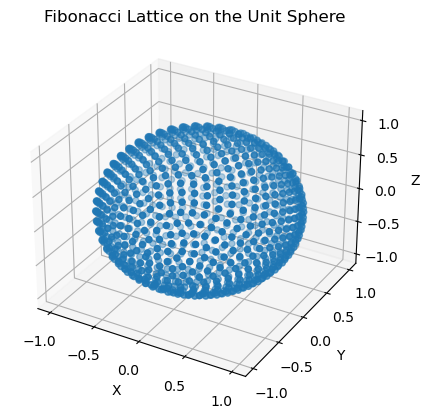

ValueError: not enough values to unpack (expected 3, got 2)

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x,y,z = points.T
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Fibonacci Lattice on the Unit Sphere')
plt.show()

points = fibonacci_lattice(50)
plot_points(points)